# Salary Predictions Based on Job Descriptions

### Problem Statement

Be able to predict the salaries of various job postings

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#your info here
__author__ = "Jared Teerlink"
__email__ = "jteerlink@gmail.com"

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('../Data/train_features.csv')
train_salaries = pd.read_csv('../Data/train_salaries.csv')
test_features = pd.read_csv('../Data/test_features.csv')


### ---- 3 Clean the data ----

In [3]:
# remove data with missing lables -- <1% of all data

train_combined = train_features.merge(train_salaries, on = 'jobId', how = 'left')
train_combined = train_combined[train_combined.salary > 0]
# train_combined.head()


In [4]:
# check for nulls
train_combined.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [5]:
# drop columsn that are too varied to use as dummy variables
train_combined.drop(labels = ['jobId', 'companyId'],inplace=True,axis=1)
                      


### ---- 4 Explore the data (EDA) ----

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(train_combined)

In [6]:
train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 7 columns):
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(4)
memory usage: 61.0+ MB


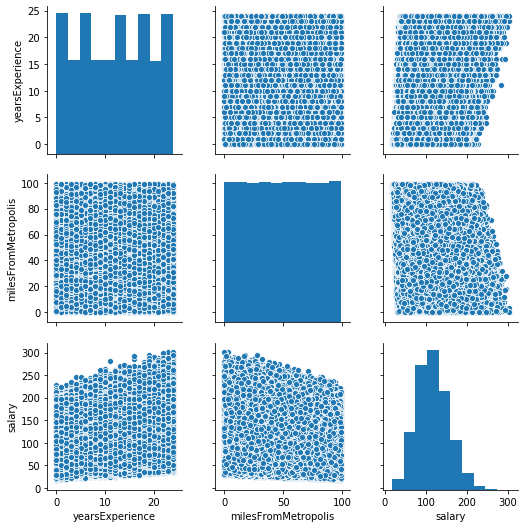

In [7]:
sns.pairplot(train_combined)

In [8]:
train_combined.groupby(['jobType','degree'])['salary'].mean()



jobType         degree     
CEO             BACHELORS      148.421009
                DOCTORAL       158.232849
                HIGH_SCHOOL    135.629182
                MASTERS        153.254510
                NONE           130.796690
CFO             BACHELORS      138.508706
                DOCTORAL       148.308742
                HIGH_SCHOOL    125.964395
                MASTERS        143.316243
                NONE           121.135389
CTO             BACHELORS      138.363172
                DOCTORAL       148.269262
                HIGH_SCHOOL    126.082232
                MASTERS        143.582019
                NONE           120.939193
JANITOR         HIGH_SCHOOL     70.976821
                NONE            70.649575
JUNIOR          BACHELORS       98.130267
                DOCTORAL       108.356035
                HIGH_SCHOOL     85.791986
                MASTERS        103.463304
                NONE            80.884064
MANAGER         BACHELORS      118.173795
      

In [9]:
train_combined.dropna()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [10]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

train_features.describe()

train_features.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [11]:
train_combined.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


<BarContainer object of 5 artists>

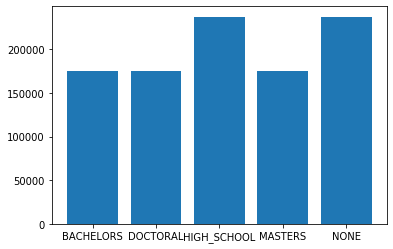

In [12]:
x = train_combined.degree.groupby(train_combined['degree']).count()

plt.bar(x.index,x)

In [13]:
numerical_features = ['yearsExperience','milesFromMetropolis']
cat_features = ['jobType','degree','industry']

subsize = str(round(len(cat_features))-1)

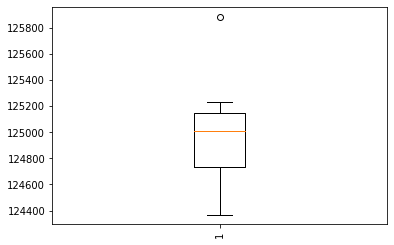

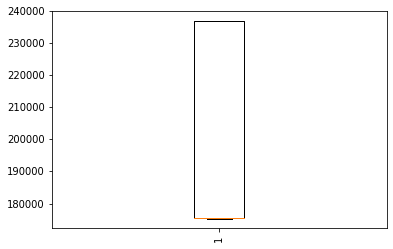

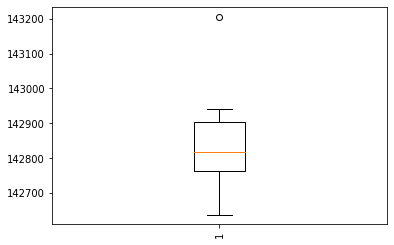

In [14]:
def cat_bar(x,y):
    data = x.groupby(x).count()  
#     plt.bar(data.index,data)
    plt.boxplot(data)
    plt.xticks(rotation=90)
    plt.show()


for i in cat_features:
    cat_bar(train_combined[i],cat_features)


In [15]:
train_combined[train_combined.salary>100].groupby(train_combined['jobType']).mean()

,yearsExperience,milesFromMetropolis,salary
jobType,,,
CEO,12.485572,48.066349,150.155763
CFO,12.798705,47.162137,143.129997
CTO,12.828036,47.146234,143.208874
JANITOR,18.983989,24.799126,116.452803
JUNIOR,15.628084,38.185723,124.715868
MANAGER,13.936937,43.721678,132.074810
SENIOR,14.707006,41.009145,128.144101
VICE_PRESIDENT,13.304653,45.603642,137.178290


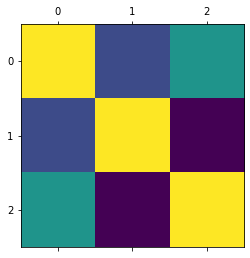

In [16]:
plt.matshow(train_combined.corr())
plt.show()

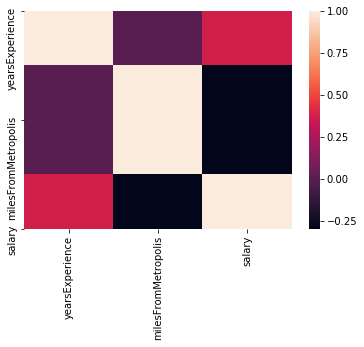

In [17]:
sns.heatmap(train_combined.corr())